In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

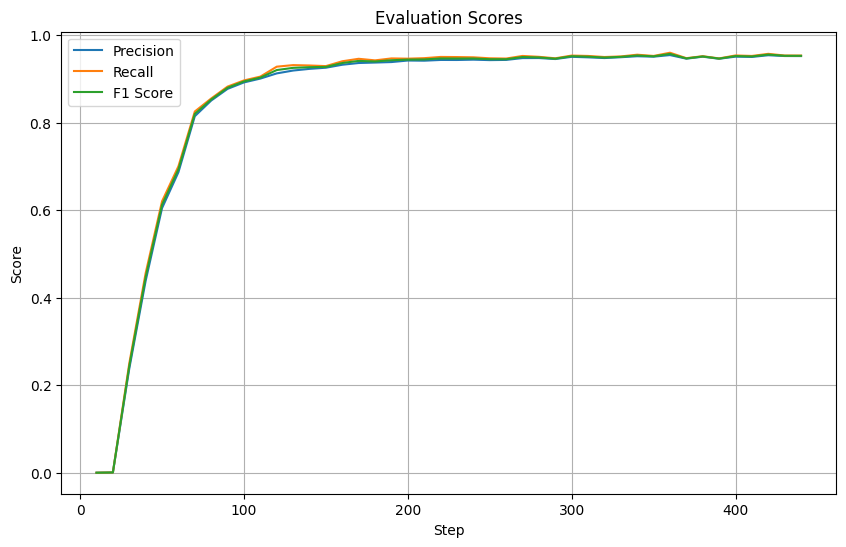

In [8]:

# 读取单个分类
df = pd.read_csv('/Users/lid/Downloads/src/ml/address-parse-pytorch/eval/eval_20240314145454/scores/road_scores.csv')

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['precision'], label='Precision')
plt.plot(df['step'], df['recall'], label='Recall')
plt.plot(df['step'], df['f1_score'], label='F1 Score')
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('Evaluation Scores')
plt.legend()
plt.grid(True)
plt.show()


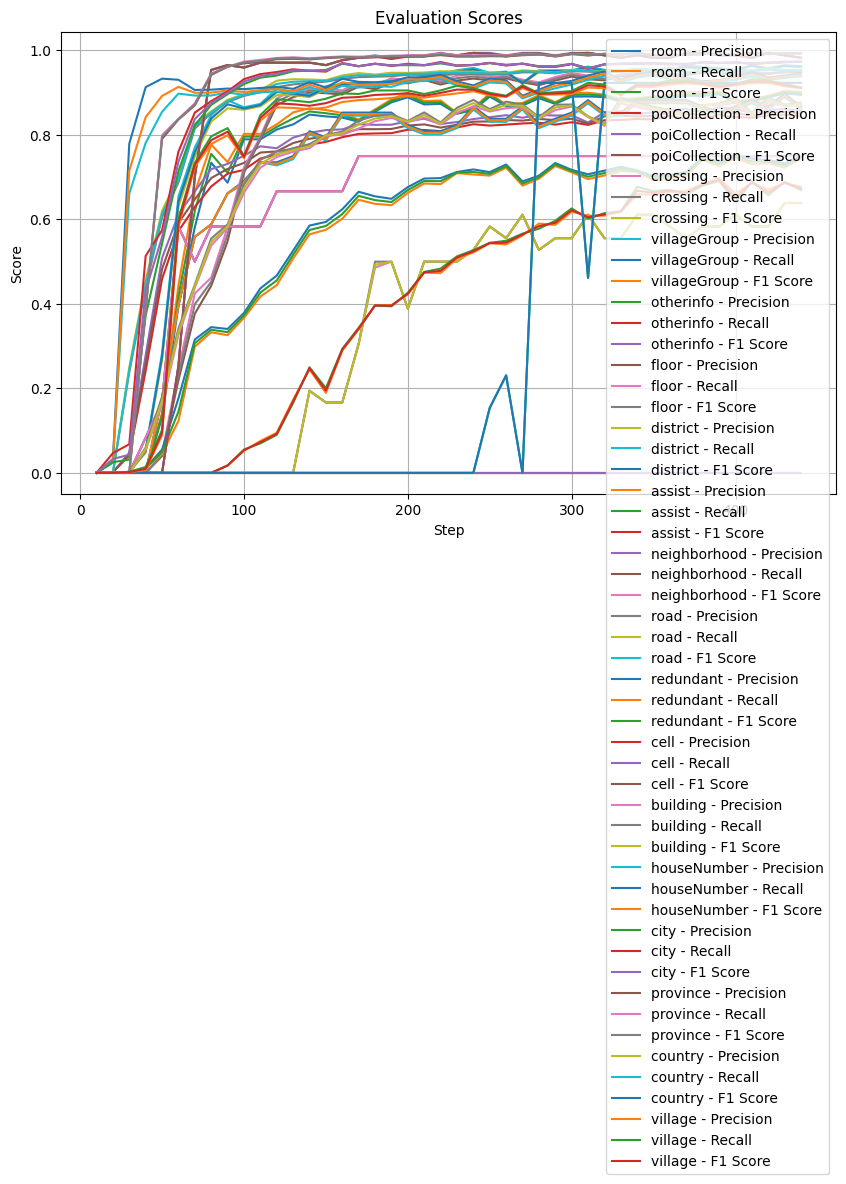

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 读取多个文件, 在一个图显示
# 设置目录路径
directory = '/Users/lid/Downloads/src/ml/address-parse-pytorch/eval/eval_20240314145454/scores'

# 创建一个空的 DataFrame 用于存储所有数据
all_data = pd.DataFrame()

# 遍历目录下的所有文件
for filename in os.listdir(directory):
    if filename.endswith("_scores.csv"):  # 只处理以 _scores.csv 结尾的文件
        file_path = os.path.join(directory, filename)
        # 读取 CSV 文件并将数据添加到 DataFrame 中
        df = pd.read_csv(file_path)
        # 添加分类信息到 DataFrame 中
        category = filename.split('_')[0]
        df['Category'] = category
        all_data = pd.concat([all_data, df], ignore_index=True)

# 创建大画布
plt.figure(figsize=(10, 6))

# 遍历 DataFrame 中的分类
for category in all_data['Category'].unique():
    category_data = all_data[all_data['Category'] == category]
    plt.plot(category_data['step'], category_data['precision'], label=f'{category} - Precision')
    plt.plot(category_data['step'], category_data['recall'], label=f'{category} - Recall')
    plt.plot(category_data['step'], category_data['f1_score'], label=f'{category} - F1 Score')

plt.xlabel('Step')
plt.ylabel('Score')
plt.title('Evaluation Scores')
plt.legend()
plt.grid(True)
plt.show()


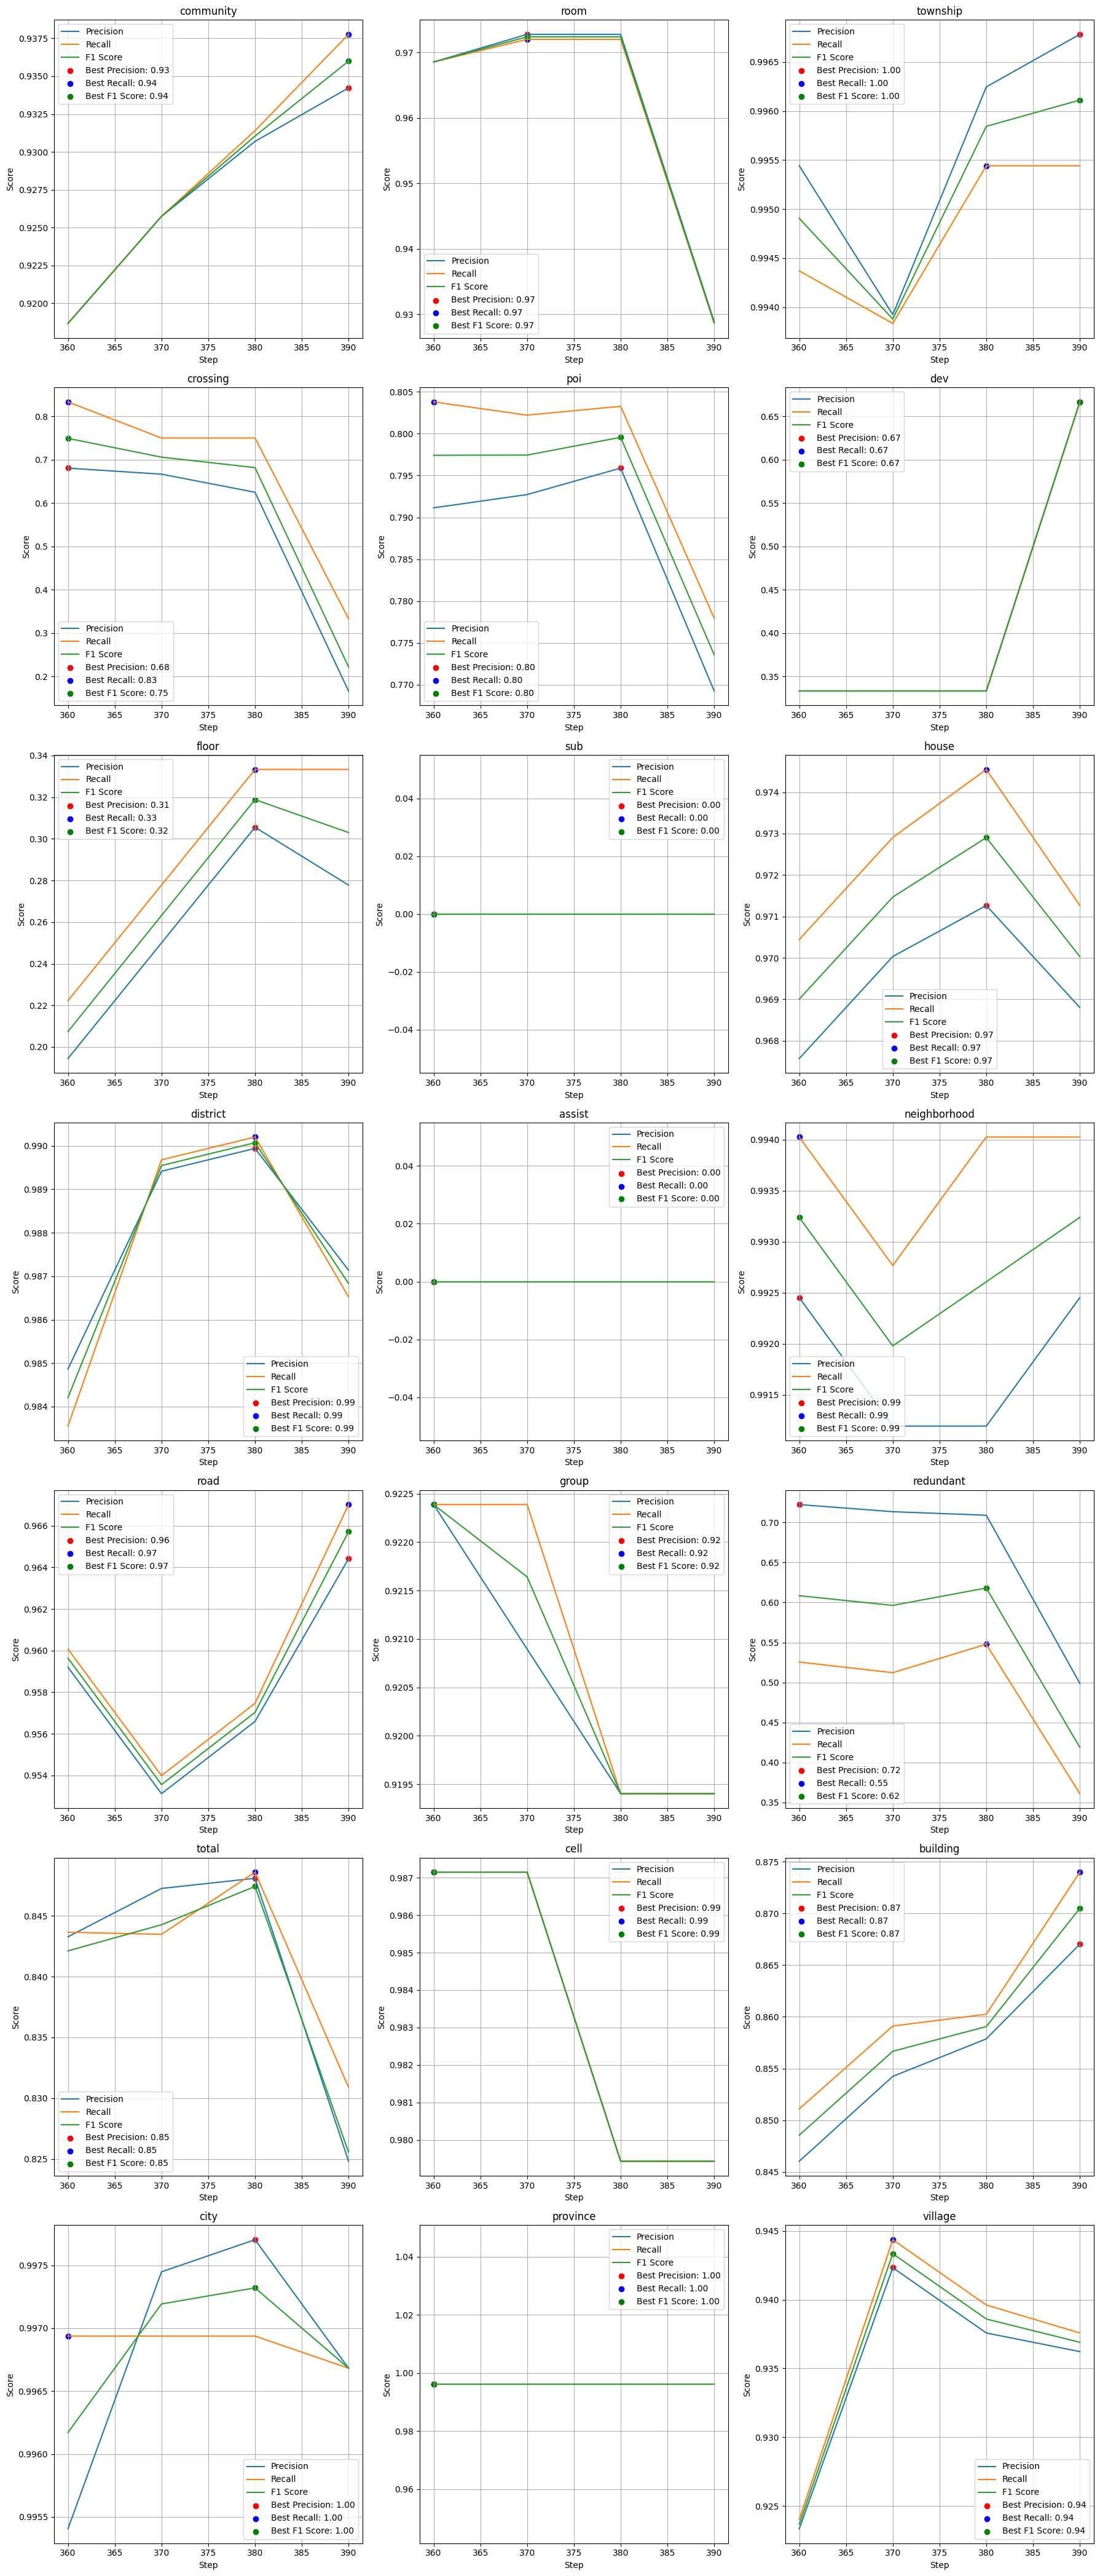

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 设置目录路径
directory = '/Users/lid/Downloads/src/ml/address-parser/eval/eval_20240317012339/scores'
row_size = 3

# 获取目录下所有文件
files = [f for f in os.listdir(directory) if f.endswith("_scores.csv")]

# 计算子图的行数和列数
num_files = len(files)
num_rows = int(num_files / row_size) + (num_files % row_size > 0)
num_cols = min(num_files, row_size)

# 创建画布和子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

# 遍历文件并绘制子图
for i, filename in enumerate(files):
    row = i // num_cols
    col = i % num_cols
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path)
    category = filename.split('_')[0]
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.plot(df['step'], df['precision'], label='Precision')
    ax.plot(df['step'], df['recall'], label='Recall')
    ax.plot(df['step'], df['f1_score'], label='F1 Score')
    ax.set_title(category)
    ax.set_xlabel('Step')
    ax.set_ylabel('Score')
    ax.legend()
    ax.grid(True)

    # 标记最佳分数
    best_precision = df.loc[df['precision'].idxmax()]
    best_recall = df.loc[df['recall'].idxmax()]
    best_f1_score = df.loc[df['f1_score'].idxmax()]
    ax.scatter(best_precision['step'], best_precision['precision'], color='red', label=f'Best Precision: {best_precision["precision"]:.2f}')
    ax.scatter(best_recall['step'], best_recall['recall'], color='blue', label=f'Best Recall: {best_recall["recall"]:.2f}')
    ax.scatter(best_f1_score['step'], best_f1_score['f1_score'], color='green', label=f'Best F1 Score: {best_f1_score["f1_score"]:.2f}')
    ax.legend()

# 调整子图的布局
plt.tight_layout()
plt.show()
